# PCA

In [5]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

raw_data = load_breast_cancer()
X = raw_data.data
X
y = raw_data.target
y # We have y values, but we use PCA as unsupervised preprocessing

df = pd.DataFrame(X, columns=raw_data.feature_names)
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## PCA

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print("X_train shape", X_train.shape)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)

pca = PCA(n_components=X.shape[1]) # pca on the same number of PC:s as features in X

pca_transformations = pca.fit_transform(scaled_X_train)
print("PCA transformations", pca_transformations.shape)

proprtion_variance_explained = pca.explained_variance_ratio_# We get the variance that each PC explains

pve_cum_sum = np.cumsum(pca.explained_variance_ratio_) #The cumulative proportion variance explained
pve_cum_sum

X_train shape (381, 30)
PCA transformations (381, 30)


array([0.43203436, 0.63056911, 0.72865076, 0.79365388, 0.8451637 ,
       0.88720577, 0.90985289, 0.92682869, 0.93980414, 0.95191923,
       0.96232397, 0.9711495 , 0.97920849, 0.98432567, 0.98712294,
       0.98938615, 0.99135916, 0.9931487 , 0.99481124, 0.99586367,
       0.99677236, 0.99765685, 0.99840248, 0.99896443, 0.99946289,
       0.99970221, 0.99992151, 0.99997082, 0.99999618, 1.        ])

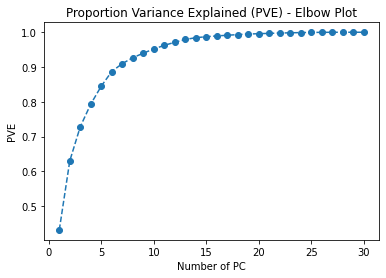

In [17]:
fig, ax = plt.figure(), plt.axes()
ax.plot(range(1, len(pve_cum_sum)+1), pve_cum_sum, "--o")
ax.set(title="Proportion Variance Explained (PVE) - Elbow Plot", ylabel="PVE", xlabel="Number of PC");

#Between 6 and 10 is good, otherwise it takes longer time and there is also risk for curse of dimensionality/overfitting

## Visualisation

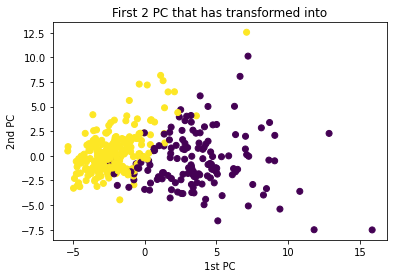

In [24]:
fig, ax = plt.figure(), plt.axes()
ax.scatter(pca_transformations[:,0], pca_transformations[:,1], c=y_train)
ax.set(title="First 2 PC that has transformed into", xlabel="1st PC", ylabel="2nd PC");

In [22]:
proprtion_variance_explained[0], proprtion_variance_explained[1]

(0.4320343615949975, 0.1985347504582236)

## PCA in a Pipeline

In PCA we do not throw away data (as in lasso), but we have only reduced the number of dimensions

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

def evaluate_model(model, title):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title(title)


              precision    recall  f1-score   support

           0       0.96      0.96      0.96        67
           1       0.98      0.98      0.98       121

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



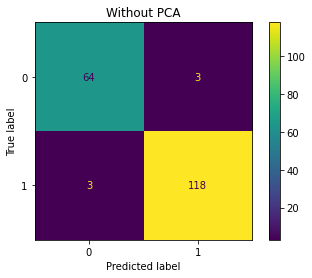

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

pipe_with_pca = Pipeline([
                ("scaling", StandardScaler()),
                ("dimension_reduction", PCA(n_components=10)), 
                ("svm", LinearSVC())
])

pipe_no_pca = Pipeline([
                ("scaling", StandardScaler()),
                ("svm", LinearSVC())
])

evaluate_model(pipe_no_pca, "Without PCA")

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.99      0.98      0.99       121

    accuracy                           0.98       188
   macro avg       0.98      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188



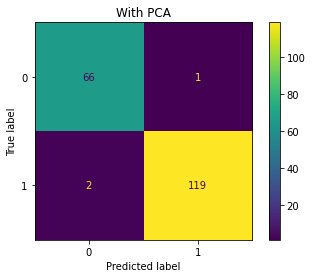

In [27]:
evaluate_model(pipe_with_pca, "With PCA")